In [56]:
import numpy as np
import pandas as pd
pd.set_option('display.expand_frame_repr', False)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':40,
         'ytick.labelsize': 40}
plt.rcParams.update(params)


sns.set(style='darkgrid')
sns.set_palette(sns.color_palette("Blues"))


### Inspecting the data

In [57]:
df = pd.read_csv("./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

In [58]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [59]:
rows_wo_reviews = df[df['reviews.text'].isnull() == True]

In [60]:
len(rows_wo_reviews)

0

In [61]:
print(f'total number of reviews: {df.shape[0]}')

total number of reviews: 28332


In [62]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [63]:
list(set(df['primaryCategories'].tolist()))


['Office Supplies',
 'Electronics,Media',
 'Home & Garden',
 'Electronics',
 'Toys & Games,Electronics',
 'Health & Beauty',
 'Electronics,Furniture',
 'Animals & Pet Supplies',
 'Office Supplies,Electronics']

In [64]:
df['reviews.title'].head()

0    ... 3 of them and one of the item is bad quali...
1    ... always the less expensive way to go for pr...
2    ... are not Duracell but for the price i am ha...
3    ... as well as name brand batteries at a much ...
4    ... batteries are very long lasting the price ...
Name: reviews.title, dtype: object

In [65]:
print(df['reviews.numHelpful'].isnull().sum(), df['reviews.doRecommend'].isnull().sum())

12217 12246


In [66]:
#number of reviews for each product
df[['name', 'reviews.text']].groupby('name').agg('count')

,reviews.text
name,
"All-New Fire 7 Tablet with Alexa, 7"" Display, 8 GB - Marine Blue",82
"All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Blue Kid-Proof Case",233
"All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Pink Kid-Proof Case",293
"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers",883
"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Marine Blue - with Special Offers",160
...,...
Kindle PowerFast International Charging Kit (for accelerated charging in over 200 countries),5
"Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Free 3G + Wi-Fi - Includes Special Offers",36
"Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers",505


In [67]:
# do the analysis for one of the products
df = df[df['name']
        == 'All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers']  

In [68]:
df.shape

(883, 24)

/home/atefehmorsali/anaconda3/envs/nlp/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '5'),
  Text(1, 0, '4'),
  Text(2, 0, '3'),
  Text(3, 0, '2'),
  Text(4, 0, '1')])

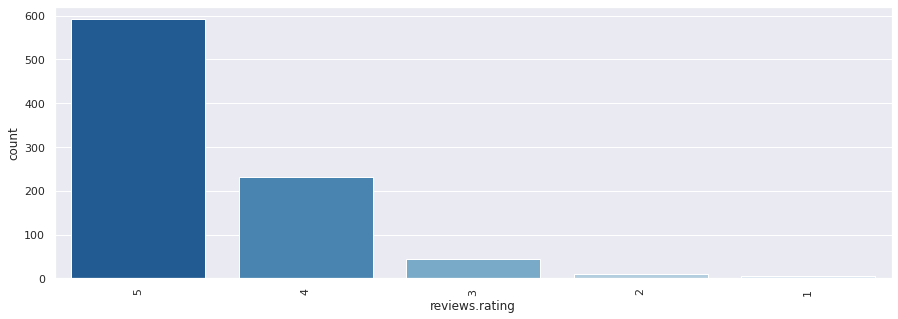

In [69]:
#inspect to see the overal customer ratings for this particular product
from collections import Counter
sns.countplot(df['reviews.rating'], order=[x for x, count in sorted(Counter(df['reviews.rating']).items(), key=lambda x: -x[1])], palette="Blues_r")
plt.xticks(rotation=90)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/atefehmorsali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


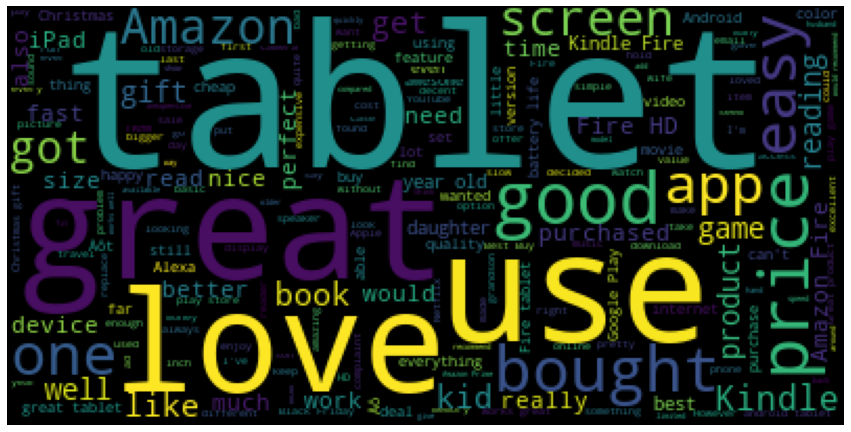

In [70]:
# visualize the most frequent words used in customer reviews using Word cloud 
import nltk
from nltk.corpus import stopwords

%matplotlib inline
import matplotlib as plt
from wordcloud import WordCloud, STOPWORDS

nltk.download('stopwords')
stopWords = stopwords.words('english')

plt.rcParams['figure.figsize'] = (15, 10)


reviews = df['reviews.text'].tolist()
Text = ' '.join(reviews)


word_cloud = WordCloud(stopwords=stopWords).generate(Text)  
plt.pyplot.imshow(word_cloud)
plt.pyplot.axis('off')
plt.pyplot.savefig('reviewsWordCloud.jpg')
plt.pyplot.show()



### Text Processing and Data Preparation

start with a basic Natural Language Pre-processing

- Extract English Words
- Lemmatize text to exclude repeated words with same root
- Stem words to avoid over counting same meaning words
- Remove stop words

I have process data using both NLTK & Gensim+spaCy Library; better results with Gensim+spaCy preprocessed data! 

In [71]:
df.shape

(883, 24)

In [72]:
#keep reviews with # of characters > 20
df = df[df['reviews.text'].apply(lambda x: len(x.split()) > 20)]

In [73]:
df['reviews.text']

19407    This is a great tablet. I got it on Black Frid...
19408    My daughter said she really like her table. Sh...
19410    This was purchased to give as a Christmas gift...
19415    The fire fits perfect into my hand. It is easy...
19416    After having and using a couple 'cheaper' gene...
                               ...                        
20944    I purchased this to replace my older tablet th...
20949    Old fire tablet finally died. Got this one at ...
20956    The Kindle Fire works well and I enjoy reading...
20959    I bought for wife and she loves it. Not as goo...
20960    For $49, this is perfect for my game room. I c...
Name: reviews.text, Length: 383, dtype: object

### 1. Using NLTK Library

In [74]:
import string
import re
from nltk.stem import *
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

def process_text(raw_text):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_text) 
    words = letters_only.lower().split()
    
    stops = set(stopwords.words("english")) 
    not_stop_words = [w for w in words if not w in stops]
    
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in not_stop_words]
    
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in lemmatized]
    
    return( " ".join( stemmed ))

In [75]:
df['clean_reviews_nltk'] = df['reviews.text'].apply(lambda x: process_text(x))
df['clean_titles_nltk'] = df['reviews.title'].apply(lambda x: process_text(x))
df.loc[:, ['reviews.text', 'clean_reviews_nltk']].head()
df.loc[:, ['reviews.title', 'clean_titles_nltk']].head()

titles_nltk = df['clean_titles_nltk'].tolist()
reviews_nltk = df['clean_reviews_nltk'].tolist()

In [76]:
reviews_nltk[:1]

['great tablet got black friday amaz price downsid lot featur avail amazon prime audibl member expens membership fee select app limit hand inexpens alexa app use game run ok display photo qualiti good easi handl music book recommend addit memori card use gb work fine']

In [77]:
# append title to its review if not already in the review
for i in range(len(titles_nltk)):
    reviews_nltk[i] = reviews_nltk[i]+ ' ' + titles_nltk[i] if titles_nltk[i] not in reviews_nltk[i] else reviews_nltk[i]

In [78]:
import gensim
from gensim.utils import simple_preprocess

# Convert sentences to list of words
def sentence_to_words(sentences):
    for sentence in sentences:
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)

In [79]:
data_nltk = list(sentence_to_words(reviews_nltk))
data_nltk[:1]

[['great',
  'tablet',
  'got',
  'black',
  'friday',
  'amaz',
  'price',
  'downsid',
  'lot',
  'featur',
  'avail',
  'amazon',
  'prime',
  'audibl',
  'member',
  'expens',
  'membership',
  'fee',
  'select',
  'app',
  'limit',
  'hand',
  'inexpens',
  'alexa',
  'app',
  'use',
  'game',
  'run',
  'ok',
  'display',
  'photo',
  'qualiti',
  'good',
  'easi',
  'handl',
  'music',
  'book',
  'recommend',
  'addit',
  'memori',
  'card',
  'use',
  'gb',
  'work',
  'fine',
  'great',
  'tablet',
  'beginn',
  'amazon',
  'fan']]

### 2. Using spaCy Library

In [80]:
import re
# Remove punctuation
# df['clean_reviews'] = df['reviews.text'].map(lambda x: re.sub('[,\.!?]', '', x))
# df['clean_titles'] = df['reviews.title'].map(lambda x: re.sub('[,\.!?]', '', x))
# df['clean_reviews'] = df['reviews.text'].map(lambda x: re.sub("[^a-zA-Z]", " ", x))
# df['clean_titles'] = df['reviews.title'].map(lambda x: re.sub("[^a-zA-Z]", " ", x))

for idx, row in df.iterrows():
    row['reviews.text'] = row['reviews.text'].translate(str.maketrans('', '',string.punctuation))
    
for idx, row in df.iterrows():
     row['reviews.title'] = row['reviews.title'].translate(str.maketrans('', '', string.punctuation))

# Convert the titles to lowercase
df['clean_reviews_spaCy'] = df['reviews.text'].map(lambda x: x.lower())
df['clean_titles_spaCy'] = df['reviews.title'].map(lambda x: x.lower())


In [81]:
titles_spaCy = df.clean_titles_spaCy.values.tolist()
reviews_spaCy = df.clean_reviews_spaCy.tolist()

# append title to its review if not already in the review
for i in range(len(titles_spaCy)):
    reviews_spaCy[i] = reviews_spaCy[i]+ ' ' + titles_spaCy[i] if titles_spaCy[i] not in reviews_spaCy[i] else reviews_spaCy[i]

data_spaCy = list(sentence_to_words(reviews_spaCy))
print(data_spaCy[:1])

[['this', 'is', 'great', 'tablet', 'got', 'it', 'on', 'black', 'friday', 'at', 'an', 'amazing', 'price', 'the', 'downside', 'lot', 'of', 'features', 'are', 'only', 'available', 'to', 'amazon', 'prime', 'and', 'audible', 'members', 'with', 'an', 'expensive', 'membership', 'fee', 'and', 'the', 'selection', 'of', 'apps', 'is', 'limited', 'but', 'on', 'the', 'other', 'hand', 'it', 'aos', 'inexpensive', 'the', 'alexa', 'app', 'is', 'useful', 'games', 'run', 'ok', 'the', 'display', 'and', 'photo', 'quality', 'is', 'good', 'and', 'it', 'aos', 'easy', 'to', 'handle', 'for', 'music', 'and', 'books', 'recommend', 'an', 'additional', 'memory', 'card', 'use', 'gb', 'which', 'works', 'fine', 'great', 'tablet', 'for', 'beginners', 'and', 'amazon', 'fans']]


In [82]:
import spacy
from nltk.corpus import stopwords


stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're'])
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])  #initialize spacy 'en' model, for efficiency only keep tagger component
                 
def process_txt_2(raw_txts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    result = []
    nostop_txts = [[word for word in simple_preprocess(str(txt)) if word not in stop_words] for txt in raw_txts]
    for txt in nostop_txts:
        new_txt = nlp(" ".join(txt)) 
        result.append([token.lemma_ for token in new_txt if token.pos_ in allowed_postags])
    return result

In [83]:
data_spaCy = process_txt_2(data_spaCy)

In [84]:
print(data_spaCy[:1])

[['great', 'tablet', 'get', 'black', 'amazing', 'price', 'downside', 'lot', 'feature', 'available', 'prime', 'audible', 'member', 'expensive', 'membership', 'fee', 'selection', 'app', 'limited', 'hand', 'inexpensive', 'useful', 'game', 'run', 'ok', 'display', 'photo', 'quality', 'good', 'easy', 'handle', 'music', 'book', 'recommend', 'additional', 'memory', 'card', 'work', 'fine', 'great', 'tablet', 'beginner', 'fan']]


## Phrase Modeling: Bi-grams and Tri-grams

In [85]:
bigram_nltk = gensim.models.Phrases(data_nltk, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data], threshold=100)

bigramModel_nltk = gensim.models.phrases.Phraser(bigram_nltk)

In [86]:
bigram_spaCy = gensim.models.Phrases(data_spaCy, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data], threshold=100)

bigramModel_spaCy = gensim.models.phrases.Phraser(bigram_spaCy)

In [87]:
def make_bigrams_nltk(texts):
    return [bigramModel_nltk[txt] for txt in texts]  #for trigrams: [trigram_mod[bigram_mod[doc]] for doc in texts]

def make_bigrams_spaCy(texts):
    return [bigramModel_spaCy[txt] for txt in texts]

In [88]:
# Form Bigrams

data_lemmatized_nltk = make_bigrams_nltk(data_nltk)

data_lemmatized_spaCy = make_bigrams_spaCy(data_spaCy)

In [89]:
print(data_lemmatized_nltk[:1])

[['great', 'tablet', 'got', 'black_friday', 'amaz', 'price', 'downsid', 'lot', 'featur', 'avail', 'amazon', 'prime', 'audibl', 'member', 'expens', 'membership', 'fee', 'select', 'app', 'limit', 'hand', 'inexpens', 'alexa', 'app', 'use', 'game', 'run', 'ok', 'display', 'photo', 'qualiti', 'good', 'easi', 'handl', 'music', 'book', 'recommend', 'addit', 'memori', 'card', 'use', 'gb', 'work', 'fine', 'great', 'tablet', 'beginn', 'amazon', 'fan']]


In [90]:
print(data_lemmatized_spaCy[:1])

[['great', 'tablet', 'get', 'black', 'amazing', 'price', 'downside', 'lot', 'feature', 'available', 'prime', 'audible', 'member', 'expensive', 'membership', 'fee', 'selection', 'app', 'limited', 'hand', 'inexpensive', 'useful', 'game', 'run', 'ok', 'display', 'photo', 'quality', 'good', 'easy', 'handle', 'music', 'book', 'recommend', 'additional', 'memory', 'card', 'work', 'fine', 'great', 'tablet', 'beginner', 'fan']]


## Corpus & Dictionary

In [91]:
import gensim.corpora as corpora

id2word_nltk = corpora.Dictionary(data_lemmatized_nltk)  # Create Dictionary

texts = data_lemmatized_nltk    # Create Corpus
corpus_nltk = [id2word_nltk.doc2bow(text) for text in texts]

print(corpus_nltk[:1])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 2), (43, 1)]]


In [92]:
id2word_spaCy = corpora.Dictionary(data_lemmatized_spaCy)  # Create Dictionary

texts = data_lemmatized_spaCy    # Create Corpus
corpus_spaCy = [id2word_spaCy.doc2bow(text) for text in texts]

print(corpus_spaCy[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1)]]


## Topic Modeling (LDA)

- Number of topics should be specified. 
- Alpha & eta are hyperparameters & affect sparsity of topics (defaults for both in Gensim: 1.0/num_topics).
- Chunksize controls # of documents processed at a time in the training algorithm. We can speed up training by increasing chunksize (as long as the chunk of documents fit easily into memory).
- Passes controls how often we train the model on the entire corpus (similat to epochs).
- Iterations controls how often repeat a particular loop over each document.

In [38]:
from gensim.models import CoherenceModel
def compute_coherence_values(
    id2word,
    corpus,
    texts,
    limit,
    start=2,
    step=1,
    ):

    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(
            corpus=corpus,
            id2word=id2word,
            num_topics=num_topics,
            random_state=100,
            update_every=1,
            chunksize=100,
            passes=10,
            alpha='auto',
            per_word_topics=True,
            )

        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts,
                dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return (model_list, coherence_values)

In [39]:
(model_list_nltk, coherence_values_nltk) = compute_coherence_values(
    id2word=id2word_nltk,
    corpus=corpus_nltk,
    texts=data_lemmatized_nltk,
    limit=30,
    start=2,
    step=1,
    )

In [47]:
(model_list_spaCy, coherence_values_spaCy) = compute_coherence_values(
    id2word=id2word_spaCy,
    corpus=corpus_spaCy,
    texts=data_lemmatized_spaCy,
    limit=30,
    start=2,
    step=1,
    )

In [40]:
limit = 10
start = 2
step = 1
x = range(start, limit, step)


number = 0
max_score = 0

# select model with highest coherence score
for (num, score) in zip(x, coherence_values_nltk):
    if max_score < score:
        optimal_model_nltk = model_list_nltk[number]
        max_score = score

    number += 1

    print(f'preprocessing with nltk: number of topics = {num} with Coherence value = {round(score, 4)}')

preprocessing with nltk: number of topics = 2 with Coherence value = 0.2573
preprocessing with nltk: number of topics = 3 with Coherence value = 0.3208
preprocessing with nltk: number of topics = 4 with Coherence value = 0.3115
preprocessing with nltk: number of topics = 5 with Coherence value = 0.3455
preprocessing with nltk: number of topics = 6 with Coherence value = 0.3383
preprocessing with nltk: number of topics = 7 with Coherence value = 0.2822
preprocessing with nltk: number of topics = 8 with Coherence value = 0.3055
preprocessing with nltk: number of topics = 9 with Coherence value = 0.2982


In [48]:
number = 0
max_score = 0

for (num, score) in zip(x, coherence_values_spaCy):
    if max_score < score:
        optimal_model_spaCy = model_list_spaCy[number]
        max_score = score

    number += 1

    print(f'preprocessing with Gensim+spaCy: number of topics = {num} with Coherence value = {round(score, 4)}')

preprocessing with Gensim+spaCy: number of topics = 2 with Coherence value = 0.3256
preprocessing with Gensim+spaCy: number of topics = 3 with Coherence value = 0.326
preprocessing with Gensim+spaCy: number of topics = 4 with Coherence value = 0.3355
preprocessing with Gensim+spaCy: number of topics = 5 with Coherence value = 0.3692
preprocessing with Gensim+spaCy: number of topics = 6 with Coherence value = 0.3265
preprocessing with Gensim+spaCy: number of topics = 7 with Coherence value = 0.3739
preprocessing with Gensim+spaCy: number of topics = 8 with Coherence value = 0.4018
preprocessing with Gensim+spaCy: number of topics = 9 with Coherence value = 0.3991


### Select model 

In [42]:
from pprint import pprint

model_topics_nltk = optimal_model_nltk.show_topics(formatted=False)
pprint(optimal_model_nltk.print_topics(num_words=10))

[(0,
  '0.037*"fire" + 0.035*"hd" + 0.019*"love" + 0.019*"old" + 0.019*"year" + '
  '0.013*"game" + 0.012*"great" + 0.011*"use" + 0.010*"got" + 0.010*"fit"'),
 (1,
  '0.022*"bad" + 0.016*"gb" + 0.011*"charg" + 0.011*"back" + 0.009*"replac" + '
  '0.008*"bright" + 0.008*"thought" + 0.008*"nexu" + 0.008*"screen" + '
  '0.008*"grandkid"'),
 (2,
  '0.055*"great" + 0.038*"tablet" + 0.037*"love" + 0.034*"kindl" + 0.029*"one" '
  '+ 0.026*"use" + 0.019*"fire" + 0.018*"bought" + 0.018*"read" + '
  '0.017*"work"'),
 (3,
  '0.066*"tablet" + 0.027*"amazon" + 0.025*"price" + 0.023*"good" + '
  '0.021*"app" + 0.015*"screen" + 0.015*"great" + 0.014*"get" + 0.014*"use" + '
  '0.012*"play"'),
 (4,
  '0.020*"devic" + 0.018*"older" + 0.014*"budget" + 0.014*"person" + '
  '0.014*"pictur" + 0.014*"big" + 0.014*"happi" + 0.012*"stream" + '
  '0.012*"updat" + 0.009*"news"')]


In [49]:
model_topics_spaCy = optimal_model_spaCy.show_topics(formatted=False)
pprint(optimal_model_spaCy.print_topics(num_words=10))

[(0,
  '0.041*"device" + 0.030*"good" + 0.026*"low" + 0.019*"believe" + '
  '0.015*"install" + 0.014*"happy" + 0.013*"product" + 0.012*"ebook" + '
  '0.010*"travel" + 0.010*"ad"'),
 (1,
  '0.027*"fire" + 0.020*"store" + 0.017*"offer" + 0.017*"available" + '
  '0.016*"play" + 0.015*"inexpensive" + 0.015*"buy" + 0.015*"expensive" + '
  '0.014*"display" + 0.013*"back"'),
 (2,
  '0.033*"ad" + 0.022*"like" + 0.016*"turn" + 0.014*"youtube" + 0.014*"item" + '
  '0.014*"solid" + 0.014*"volume" + 0.010*"throw" + 0.010*"think" + '
  '0.009*"additional"'),
 (3,
  '0.042*"know" + 0.028*"reading" + 0.026*"hd" + 0.018*"fire" + 0.016*"review" '
  '+ 0.015*"actually" + 0.013*"processor" + 0.013*"kindle" + 0.011*"pick" + '
  '0.010*"stop"'),
 (4,
  '0.074*"love" + 0.060*"old" + 0.040*"year" + 0.032*"book" + 0.022*"kindle" + '
  '0.018*"kid" + 0.017*"fire" + 0.014*"buy" + 0.013*"happy" + 0.013*"family"'),
 (5,
  '0.034*"bad" + 0.023*"slow" + 0.022*"pay" + 0.022*"big" + 0.021*"upgrade" + '
  '0.019*"syst

### Compute perplexity & coherence score

In [50]:
print(f'preprocessing with nltk; perplexity score: {optimal_model_nltk.log_perplexity(corpus_nltk)}')
print(f'\npreprocessing with spaCy; perplexity score: {optimal_model_spaCy.log_perplexity(corpus_spaCy)}')

preprocessing with nltk; perplexity score: -6.51987908310388

preprocessing with spaCy; perplexity score: -6.502672551589734


In [51]:
coherence_model_nltk = CoherenceModel(model=optimal_model_nltk,
        texts=data_lemmatized_nltk, dictionary=id2word_nltk, coherence='c_v')
coherence_nltk = coherence_model_nltk.get_coherence()
print(f'preprocessing with nltk; coherence score: {coherence_nltk}')



coherence_model_spaCy = CoherenceModel(model=optimal_model_spaCy,
        texts=data_lemmatized_spaCy, dictionary=id2word_spaCy, coherence='c_v')
coherence_spaCy = coherence_model_spaCy.get_coherence()
print(f'preprocessing with spaCy; coherence score: {coherence_spaCy}')

preprocessing with nltk; coherence score: 0.3455001575320337
preprocessing with spaCy; coherence score: 0.4017639845494739


### Visualize topics

In [55]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model_spaCy, corpus_spaCy, id2word_spaCy)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.301759 -0.083954       1        1  67.275667
4      0.122810  0.236123       2        1   9.109808
1      0.028068 -0.141671       3        1   7.857949
5     -0.104961  0.023175       4        1   4.299725
2     -0.136376 -0.042082       5        1   3.611643
0     -0.034397 -0.046573       6        1   3.552940
3     -0.078356  0.040695       7        1   2.825921
7     -0.098546  0.014287       8        1   1.466347, topic_info=         Term        Freq       Total Category  logprob  loglift
124      love  114.000000  114.000000  Default  30.0000  30.0000
19       good  159.000000  159.000000  Default  29.0000  29.0000
125       old   45.000000   45.000000  Default  28.0000  28.0000
70       fire  100.000000  100.000000  Default  27.0000  27.0000
7        book   61.000000   61.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1292   source    0.732413    2.453006   Topic8  -5.1029   3.0137
675     brand    0.852401    3.290427   Topic8  -4.9511   2.8717
738    charge    1.405583   10.971991   Topic8  -4.4510   2.1675
253      feel    0.808310    5.250923   Topic8  -5.0043   2.3512
626   problem    0.900737   10.675979   Topic8  -4.8960   1.7499

[388 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
693       2  0.839902   ability
561       1  0.985068      able
1184      5  0.877377     abuse
458       4  0.822602   account
270       7  0.962649  actually
...     ...       ...       ...
291       4  0.971529     worth
269       1  0.990230     would
1231      3  0.899719     write
127       2  0.990784      year
924       5  0.844095   youtube

[448 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 2, 6, 3, 1, 4, 8])